In [4]:
import random
import numpy as np
from numpy.random import choice

In [5]:
import pandas as pd
import random

retention_r = pd.read_csv('./monte_carlo_inputs/persistence_rates.csv')
# ['4yr_12', '4yr_23', '4yr_34', '4yr_grad', '2yr_12', '2yr_grad']
retention_r_bachelors = [
    retention_r['4yr_12'].values[0],
    retention_r['4yr_23'].values[0],
    retention_r['4yr_34'].values[0],
    retention_r['4yr_grad'].values[0],
]

retention_r_associates = [
    retention_r['2yr_12'].values[0],
    retention_r['2yr_grad'].values[0]
]


quantile_income = pd.read_csv('./monte_carlo_inputs/quantile_income.csv')
# headers: [25pct, 75pct, awd_lvl, major, median, n, years_after_grad]

#format the data
quantile_income = quantile_income.replace('Computer and Information Sciences and Support Services','cs')
quantile_income = quantile_income.replace('Engineering Technologies and Engineering-Related Fields','eng')
quantile_income = quantile_income.replace('Health Professions and Related Programs','heal')
quantile_income = quantile_income.replace('Bachelor\'s','Bachelors')
# majors: [cs, eng, heal, NaN]
# awd_lvl: [Associate, Bachelor's]

quantile_income['75pct'] =(quantile_income['75pct'].str[1:-1]).astype(float)*1000
quantile_income['25pct'] =(quantile_income['25pct'].str[1:-1]).astype(float)*1000

# uncomment to see the dataframe
quantile_income


,25pct,75pct,awd_lvl,major,50pct,n,Organization TTL,years_after_grad
0,27000.0,49800.0,Associate,cs,37875.14,2492.0,Statewide,1
1,29900.0,53600.0,Associate,cs,41132.45,2147.0,Statewide,2
2,31600.0,56200.0,Associate,cs,43094.44,1685.0,Statewide,3
3,33100.0,60900.0,Associate,cs,46751.76,1174.0,Statewide,4
4,33400.0,63600.0,Associate,cs,46582.82,754.0,Statewide,5
5,36100.0,65700.0,Associate,cs,47619.08,452.0,Statewide,6
6,37100.0,70000.0,Associate,cs,51253.10,222.0,Statewide,7
7,50400.0,89100.0,Bachelors,cs,67313.82,2426.0,Statewide,1
8,57400.0,96000.0,Bachelors,cs,74887.17,1919.0,Statewide,2
9,63200.0,105100.0,Bachelors,cs,82239.15,1429.0,Statewide,3


In [39]:
# Try using a "walk" through 7 years after starting a career 
# Attempt at a basic version of a Markov Cahin Monte Carlo simulation
import numpy as np
from numpy.random import choice
import scipy.stats as st


dropout = quantile_income[quantile_income['awd_lvl'] == 'Some College']
average_income_do = dropout['50pct'].sum()


# hacky way of normalizing quartile values and pulling a random number
def rand_quartile(mean, q_1, q_3):
    deviation = (mean - q_1 + q_3 - mean)/2 
    sd = deviation/(st.norm.ppf(.75))
    return np.random.normal(mean,sd,1)[0]

def get_dist_val(mu, q_1, q_3, p):
    deviation = (mu - q_1 + q_3 - mu)/2 
    sd = deviation/(st.norm.ppf(.75))
    return mu + sd * st.norm.cdf(p)

def calculate_ROI_7yr(bachelors, retention_rates):
    # bachelors = boolean: True if bachelors degree, False if associates
    # retention_rates = a list of retention rates by year in school
    #         retention_rates[0] = rate retained from year 1 to 2
    
    # initialize the "state" of the student receiving a scholarship
    income = 0
    cost = 0
    dropout = False
    high_earner = False
        
    quality_of_student = np.random.uniform(0,1,1)
    for i in range(0, len(retention_rates)):
        if quality_of_student < retention_rates[i]:
            cost = cost + 4500
        else:
            dropout = True
            
    # Todo: randomize "quality" of student as a worker -- determine where on the distribution of incomes they
    #       will lie
    quality_of_worker = np.random.uniform(0,1,1)
    
    for i in range(1,8):
        cur_income = 0
        if dropout:
            income_year = quantile_income[quantile_income['years_after_grad']==i]
            cur_income = income_year[income_year['awd_lvl'] == 'Some College']['50pct'].values[0]
        elif bachelors:
            income_year = quantile_income[quantile_income['years_after_grad']==i]
            income_data = income_year[income_year['awd_lvl'] == 'Bachelors']
            cur_income = get_dist_val(
                    income_data['50pct'].values[0],
                    income_data['25pct'].values[0],
                    income_data['75pct'].values[0],
                    quality_of_worker)
        else:
            income_year = quantile_income[quantile_income['years_after_grad']==i]
            income_data = income_year[income_year['awd_lvl'] == 'Associate']
            cur_income = get_dist_val(
                    income_data['50pct'].values[0],
                    income_data['25pct'].values[0],
                    income_data['75pct'].values[0],
                    quality_of_worker)
        try:
            income += cur_income[0]
            if cur_income[0] > 100000:
                high_earner = True
        except:
            income += cur_income
            if cur_income > 100000:
                high_earner = True
    #print(f'{income}, {cost}')
    return [income,cost,dropout, high_earner]

def generate_distribution(cost = 25000000):
    # generate a provisional distribution of scholarships that max out in cost under the limit
    
    # Use a uniform distribution from [1,138] for the amount of bachelor degree scholarships
    #    the motivation for this is because if given random choice, the sample will be rougly normally
    #    distributed around 50% of scholarships being allocated to bachelor's. We want to test many
    #    possible distributions
    num_of_bachelors = np.random.randint(1,cost/18000)
    cost -= num_of_bachelors * 18000
    num_of_associates = int(np.floor(cost/9000))
    scholarships = (num_of_bachelors * ['B']) + (num_of_associates * ['A'])
    return scholarships

def run_dist_7yr(current):
    students = []
    
    # run an iteration of total ROI for the given distribution
    # current = a distribution of [x_1,x_2,...] where x_i in {A,B}
    for student in current:
        bachelors = (student == 'B')
        students.append(calculate_ROI_7yr(bachelors, retention_r_bachelors))
        
    df_students = pd.DataFrame(students, columns = ['income', 'cost', 'dropout', 'high_earner'])
    return df_students

def monte_carlo_7yr(n, get_raw= False):
    # build a list of results for monte carlo
    results_b = []
    results_a = []
    raw = []
    for i in range(n):
        current = generate_distribution()
        cur_students = run_dist_7yr(current)
        
        [income, cost, roi] = high_earners(cur_students) #roi fn
        
        results_b.append([current.count('B'), roi])
        results_a.append([current.count('A'), roi])
        raw.append([current.count('B'),current.count('A'),income,cost,roi])
    print(raw)
    if get_raw:
        raw_df = pd.DataFrame(np.array(raw).reshape(n,5), columns = ['num_of_bachelors','num_of_associates','income','cost', 'ROI'])
        raw_df.to_csv('./output/raw_7yr.csv',index=False)
    return results_b, results_a

# TODO: CREATE ROI FUNCTIONS THAT TAKE DATAFRAMES OF STUDENTS AND OUTPUT ROI

def adjusted_roi(s):
    dropouts = s[s['dropout'] == True]
    cost = dropouts['cost'].sum()
    income = s[s['dropout'] == False]['income'].sum()
    return [income, cost, (income - cost)/cost]

def high_earners(s):
    return [s['income'].sum(), s['cost'].sum(), s['high_earner'].value_counts()[True]]
    
def traditional_roi(s):
    income = s['income'].sum()
    cost = s['cost'].sum()
    return [income, cost, (income-cost)/cost]

#run_dist_7yr(generate_distribution())

In [40]:
import timeit

start = timeit.default_timer()

results_b, results_a = monte_carlo_7yr(2,get_raw=True)
  
stop = timeit.default_timer()

print('Time: ', stop - start)  

[[207, 2363, 720138525.4225438, 31302000, 100], [1228, 321, 642163607.4755133, 19336500, 612]]
Time:  32.87906509977802


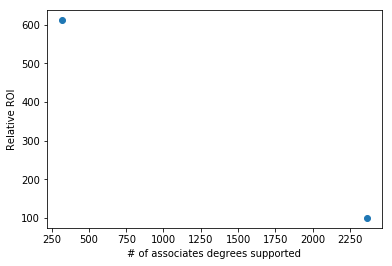

In [43]:
import matplotlib.pyplot as plt

plt.scatter(*zip(*results_a))
plt.xlabel('# of associates degrees supported')
plt.ylabel('Relative ROI')
plt.show()

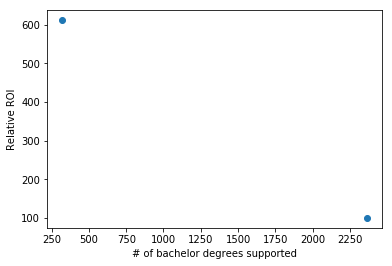

In [44]:
plt.scatter(*zip(*results_a))
plt.xlabel('# of bachelor degrees supported')
plt.ylabel('Relative ROI')
plt.show()

In [17]:
results_b

[[1108, 102.56433772846981],
 [83, 68.29087639130168],
 [137, 62.81260566571976],
 [1270, 109.61903328018234],
 [339, 69.27681776689593],
 [761, 80.94904457859306],
 [164, 63.688894390448624],
 [730, 81.57261546737341],
 [259, 68.80178855373971],
 [656, 82.98328604213012],
 [1380, 107.11274828608005],
 [1156, 94.8797292774815],
 [1033, 103.33595358448694],
 [1177, 101.54868006936788],
 [1105, 97.9717360386227],
 [307, 62.52773261578308],
 [871, 85.07780188379745],
 [1043, 93.56469738110737],
 [1271, 110.39340924914362],
 [848, 92.11482294940545],
 [939, 87.55086832429893],
 [131, 66.07403549366606],
 [1301, 111.22336251827834],
 [1277, 112.95037425121636],
 [1135, 97.48481122868044],
 [63, 64.46498058991156],
 [479, 69.35733110119658],
 [1175, 101.14091861578954],
 [27, 62.63035017287039],
 [651, 82.30023021279304]]

In [18]:
lifetime_quantile = pd.read_csv('./monte_carlo_inputs/lifetime_earnings.csv')
lifetime_quantile = lifetime_quantile.replace('Computer Science','cs')
lifetime_quantile = lifetime_quantile.replace('Engineering Technologies','et')
lifetime_quantile = lifetime_quantile.replace('Health and Medical Administration','h')


lifetime_quantile

,awd_lvl,major,50pct,75pct,25pct
0,Bachelors,et,1490000,960000,2020000
1,Bachelors,cs,1690000,1050000,2280000
2,Some College,NaN,730000,410000,1080000
3,Associates,NaN,870000,520000,1250000
4,Bachelors,h,1120000,690000,1590000


In [21]:
# TO-DO | Calculate High-Earner given input. This can be done by either adding an input to this
#         or simply calculate it given our data. Right now we use a flat number from hamiltonproject
#         of top 10% for all majors in a bachelor's degree
HIGH_EARNER = 3100000


def run_dist_lifetime(distribution):
    students = []
    for student in distribution:
        students.append(rand_lifetime_earnings(student == 'B', retention_r_bachelors))
    df_students = pd.DataFrame(students, columns=['income', 'cost', 'dropout', 'high_earner'])
    return df_students
            
def rand_lifetime_earnings(bachelors, retention_rates):
    income = 0
    cost = 0
    major = ""
    dropout = False
        
    quality_of_student = np.random.uniform(0,1,1)
    for i in range(0, len(retention_rates)):
        if quality_of_student > retention_rates[i] and not dropout:
            cost = 4500 * (i+1)
            dropout = True
            
    if cost == 0:
        if bachelors:
            cost = 4500 * 4
            major = random.choice(['et','cs','h'])
        else:
            cost = 4500 * 2
            
    quality_of_worker = np.random.uniform(0,1,1)

    if dropout:
        # some college
        lft_earnings = lifetime_quantile[lifetime_quantile['awd_lvl']=='Some College']
        income = get_dist_val(
                    lft_earnings['50pct'].values[0],
                    lft_earnings['25pct'].values[0],
                    lft_earnings['75pct'].values[0],
                    quality_of_worker)
    elif bachelors:
        # bachelors
        lft_earnings = lifetime_quantile[lifetime_quantile['awd_lvl']=='Bachelors']
        lft_earnings = lft_earnings[lft_earnings['major']==major]
        income = get_dist_val(
                    lft_earnings['50pct'].values[0],
                    lft_earnings['25pct'].values[0],
                    lft_earnings['75pct'].values[0],
                    quality_of_worker)
    else:
        # associates
        lft_earnings = lifetime_quantile[lifetime_quantile['awd_lvl']=='Associates']
        income = get_dist_val(
                    lft_earnings['50pct'].values[0],
                    lft_earnings['25pct'].values[0],
                    lft_earnings['75pct'].values[0],
                    quality_of_worker)
    try:
        return [income[0],cost, dropout, (income > HIGH_EARNER)[0]]
    except:
        return [income, cost, dropout, (income > HIGH_EARNER)[0]]
        

def monte_carlo_lifetime(n, get_raw= False):
    # build a list of results for monte carlo
    results = []
    raw = []
    for i in range(0,n):
        current = generate_distribution()
        cur_students = run_dist_lifetime(current)
        income = cur_students['income'].sum()
        cost = cur_students['cost'].sum()
        
        roi = adjusted_roi(cur_students) # roi fn
        
        results.append([current.count('B'), roi])
        raw.append([current.count('B'),current.count('A'),income,cost, roi])
    if get_raw:
        raw_df = pd.DataFrame(np.array(raw).reshape(n,5), columns = ['num_of_bachelors','num_of_associates','income','cost', 'ROI'])
        raw_df.to_csv('./output/raw_lft.csv',index=False)
    return results

# TO-DO: put ROI functions here, take df of students as input
def adjusted_roi(s):
    dropouts = s[s['dropout'] == True]
    cost = dropouts['cost'].sum()
    income = s[s['dropout'] == False]['income'].sum()
    return (income - cost)/cost

def high_earners(s):
    return s[s['high_earner'] == True].sum()
    
def traditional_roi(s):
    income = s['income'].sum()
    cost = s['cost'].sum()
    return (income-cost)/cost


run_dist_lifetime(generate_distribution())

,income,cost,dropout,high_earner
0,1.088621e+06,18000,False,False
1,1.039807e+06,18000,False,False
2,7.550641e+05,18000,False,False
3,4.302247e+05,18000,True,False
4,9.350857e+05,18000,False,False
5,4.683848e+05,18000,True,False
6,3.543828e+05,13500,True,False
7,1.185197e+06,18000,False,False
8,1.032638e+06,18000,False,False
9,7.544509e+05,18000,False,False


In [23]:
import timeit

start = timeit.default_timer()

results = monte_carlo_lifetime(100,get_raw=True)
  
stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  201.17440960472004


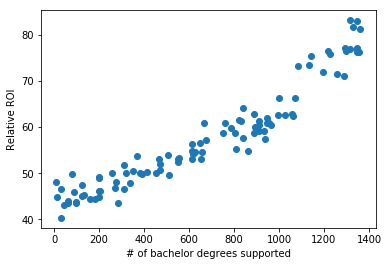

In [24]:
import matplotlib.pyplot as plt

#print(results)

plt.scatter(*zip(*results))
plt.xlabel('# of bachelor degrees supported')
plt.ylabel('Relative ROI')
plt.show()

In [25]:
Bachelors = quantile_income[quantile_income["awd_lvl"] == "Bachelors"]
cs_Bachelors = Bachelors[Bachelors["major"] == "cs"]
for i in range(1,8):
    print(cs_Bachelors[cs_Bachelors["years_after_grad"] == i]["50pct"])

7    67313.82
Name: 50pct, dtype: float64
8    74887.17
Name: 50pct, dtype: float64
9    82239.15
Name: 50pct, dtype: float64
10    88867.81
Name: 50pct, dtype: float64
11    94906.09
Name: 50pct, dtype: float64
12    100604.5
Name: 50pct, dtype: float64
13    107289.7
Name: 50pct, dtype: float64
